In [1]:
!python --version


Python 3.12.12


In [2]:
bs = 32 # batch size
version = 3

In [3]:
!pip install -Uqq fastai fastbook nbdev ddgs==9.5.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00


In [4]:
! pip uninstall -y fastprogress
! pip install "fastprogress==1.0.3"

Found existing installation: fastprogress 1.1.3
Uninstalling fastprogress-1.1.3:
  Successfully uninstalled fastprogress-1.1.3


In [5]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/My Drive/Pitha Recognizer

/content/drive/My Drive/Pitha Recognizer


# Fetch Data

In [8]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [9]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/pitha_dataloader_v{version}.pkl")

In [10]:
import torch
from fastai.data.core import DataLoaders

# Allow the DataLoaders class
torch.serialization.add_safe_globals([DataLoaders])

# Now load
dls = torch.load(f"dataloaders/pitha_dataloader_v{version}.pkl", weights_only=False)


In [11]:
dls.train.vocab

['Chit ruti Pitha', 'Pata Pitha (Leaf-shaped Pitha)', 'atikka pitha', 'bhapa pitha', 'bibikhana pitha', 'binni chaler pitha', 'chitoi pitha', 'choi pitha', 'dim shundori pitha', 'dudh chitoi pitha', 'dudh puli pitha', 'fuljhuri pitha', 'jhinuk pitha', 'khejur pitha', 'mera pitha', 'nokshi pitha', 'patisapta pitha', 'puli pitha', 'semai pitha', 'teler pitha']

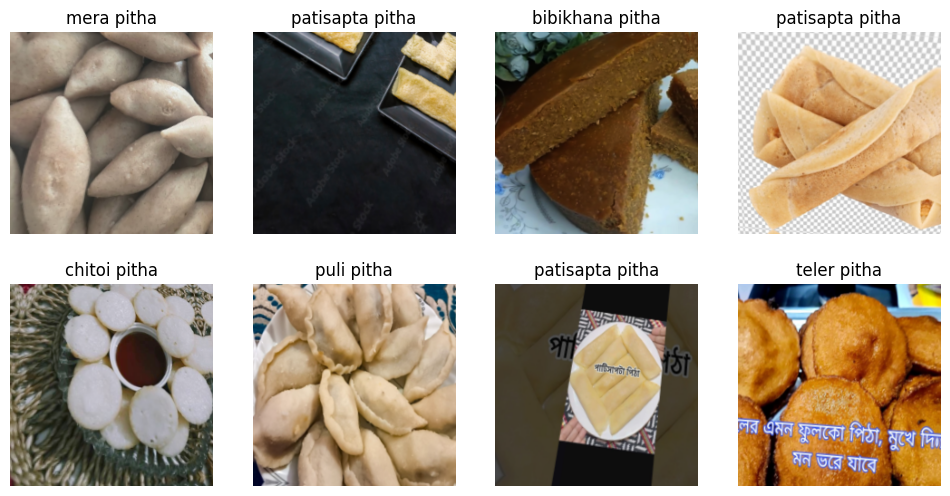

In [12]:
dls.train.show_batch(max_n=8, nrows=2)

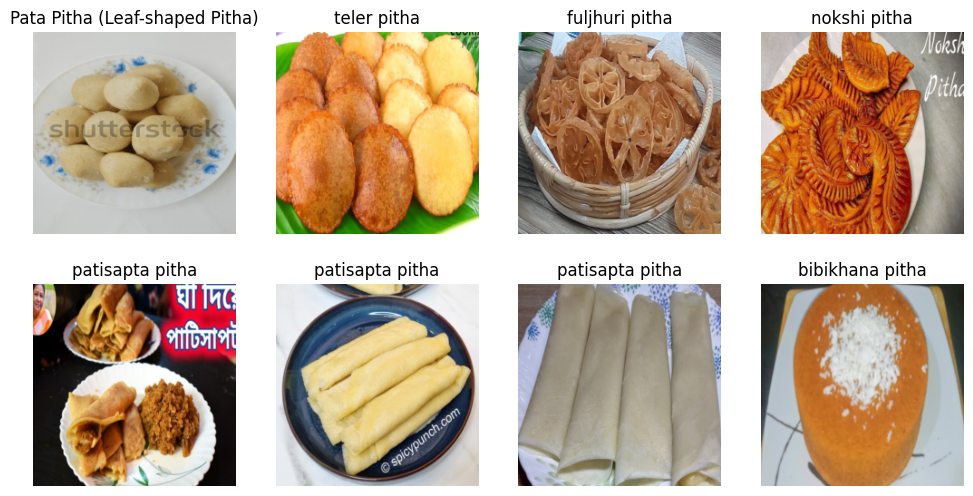

In [13]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training and Data Cleaning

In [14]:
model_path = "models"

In [15]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 192MB/s]


In [19]:
model.load(f"pitha-recognizer-v{version-1}")

In [ ]:
model.fine_tune(5)

In [ ]:
#model.fine_tune(1)

In [20]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.414181,0.205315,0.036199,0.963801,06:34


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.320192,0.193889,0.040724,0.959276,00:30


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.save(f"pitha-recognizer-v{version}")

In [ ]:
model.load(f"pitha-recognizer-v{version}")

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(8,8))

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [ ]:
import dill
model.export(f"{model_path}/pitha-recognizer-v{version-3}.pkl", pickle_module=dill)

